# Avocado Project
<br><br>
### Introduction
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. <br><br>The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. <br><br>Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. <br><br>The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.<br><br>In this problem, we are going to use Machine Learning Models to predict the Average Price of the Avocados.<br><br>
#### Some relevant columns in the dataset:<br>
* Date - The date of the observation
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold

### <br> Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving avocado_new to avocado_new (2)


In [3]:
df=pd.read_csv("avocado_new")

### Exploratory Data Analysis

In [4]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


This shows the first five rows of the dataset.

In [5]:
df.shape

(16468, 14)

We can see that there are 16468 rows and 14 columns in the dataset

In [6]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

We can see all the column names in the dataset.

**Dropping 'Unnamed: 0' Column**

In [7]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
df.shape

(16468, 13)

There are 16468 rows and 13 columns in the dataset now.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 1.6+ MB


This describes the information of the the columns of the dataset. It shows the column names, count and datatype.

In [10]:
df.isnull().sum()

Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

We can see that there are 14951 null values in all the columns.

<br>After checking the dataset I see that there are no values from 1518 row. From this row, all the rows are missing values for all the columns.<br><br>Hence,dropping these rows.

In [11]:
#dropping null values
DF=  df.drop(df.index[1517:])

In [12]:
DF.shape

(1517, 13)

**Doing Exploratory Data Analysis on the new dataset created after dropping all the null values.**

In [13]:
DF.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [14]:
DF.shape

(1517, 13)

Now we can see that there are 1517 rows and 13 columns.

In [15]:
DF.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [16]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 165.9+ KB


This describes the information of the the columns of the dataset. It shows the column names, count and datatype. Also, we can see that there are no missing values in the dataset.

In [17]:
DF.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are no missing values in the dataset now

In [18]:
DF.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

We can see the datatypes of all the columns here.

In [19]:
DF.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [20]:
DF.describe().apply(lambda s: s.apply('{0:.5f}'.format))
#correcting the scientific values in the statistical description

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.00000,1517.00000,1517.00000,1517.00000,1517.00000,1517.00000,1517.00000,1517.00000,1517.00000,1517.00000
mean,1.07499,1601879.06784,646438.65411,611437.50259,50405.49540,293597.41574,248773.59529,42642.04937,2181.77107,2015.16282
std,0.18889,4433142.82075,1947613.56974,1672906.16466,137781.24924,757976.53132,647476.52050,118215.68184,7455.71214,0.36932
min,0.49000,38750.74000,467.72000,1783.77000,0.00000,3311.77000,3311.77000,0.00000,0.00000,2015.00000
25%,0.98000,147469.99000,20400.34000,41476.06000,911.25000,36206.89000,29727.22000,540.74000,0.00000,2015.00000
50%,1.08000,402791.86000,81751.17000,118664.89000,7688.17000,73979.06000,62375.69000,5044.35000,0.00000,2015.00000
75%,1.19000,981975.08000,377578.48000,485150.34000,29167.30000,157609.68000,146199.35000,29267.67000,401.48000,2015.00000
max,1.68000,44655461.51000,18933038.04000,18956479.74000,1381516.11000,6736304.04000,5893641.72000,1121076.47000,108072.79000,2016.00000


As there were statistical values, corrected them here. In this, we can see the statistical information of the dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb15d8fe5d0>,
      dtype=object)

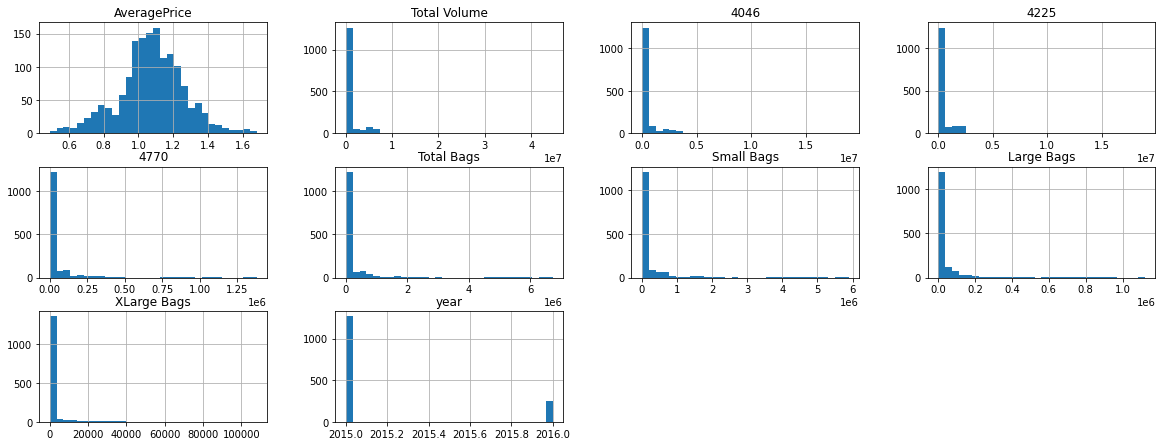

In [21]:
DF.hist(figsize=(20,10), grid=True, layout=(4, 4), bins = 30)

Histogram visualisation for each attribute showing what kind of distribution it is.

In [22]:
DF['AveragePrice'].value_counts()

1.08    46
0.99    44
1.03    44
1.09    43
1.10    43
        ..
1.61     1
1.66     1
1.60     1
0.64     1
1.64     1
Name: AveragePrice, Length: 113, dtype: int64

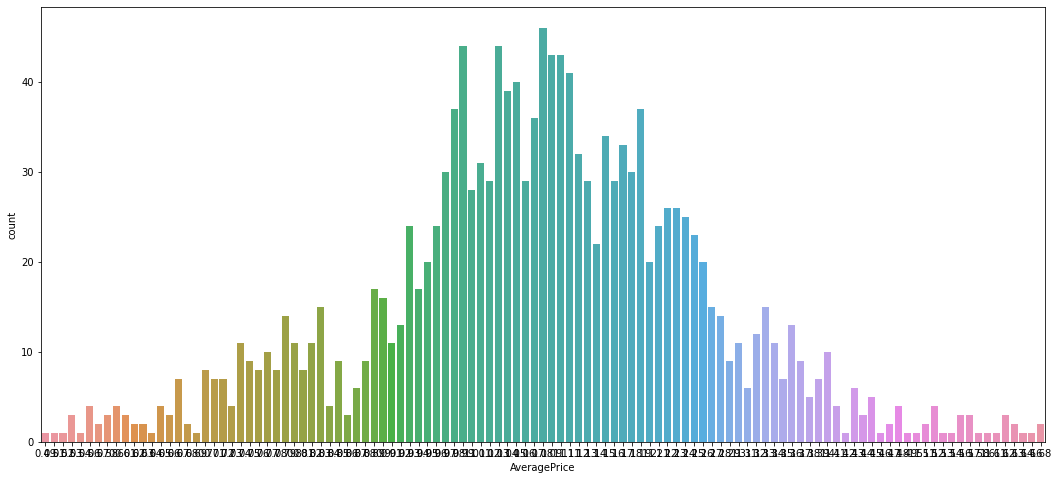

In [23]:
plt.subplots(figsize=(18, 8))
sns.countplot(DF['AveragePrice'])

In [24]:
DF['region'].nunique()

51

We can see that there are 51 different regions.

In [25]:
DF['region'].value_counts()

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Louisville             34
Tampa                  34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
TotalUS                25
Nashville              25
Denver                 24
SouthCarolina          24
GrandRapids            23
Chicago                23
Pittsburgh             22
RichmondNorfolk        21
Orlando                21
HarrisburgScranton     19
Syracuse               19
GreatLakes             18
Midsouth               18
MiamiFtLauderdale      17
Roanoke                17
DallasFtWort

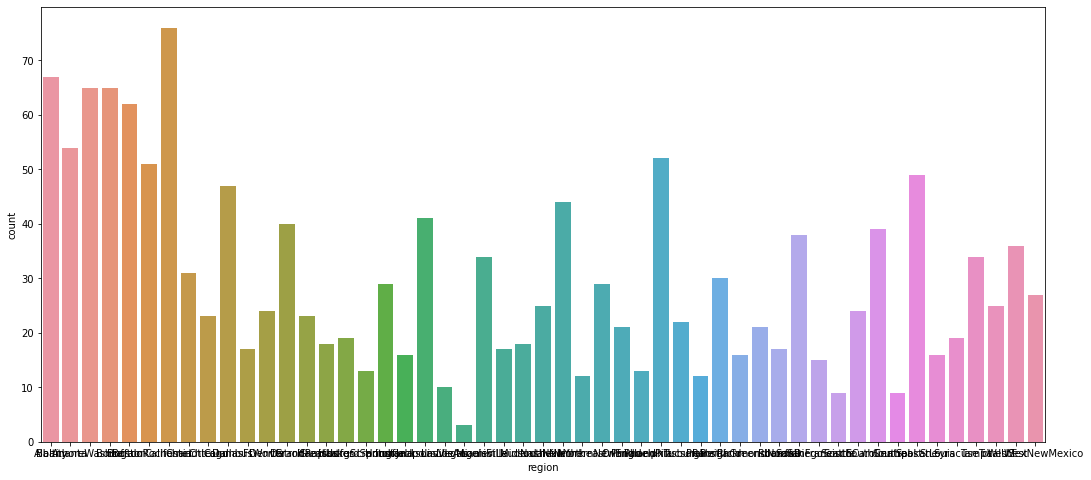

In [26]:
plt.subplots(figsize=(18, 8))
sns.countplot(DF['region'])

This Histogram shows the distribution of Avocados based on Region.

### Checking Correlation

In [27]:
DF.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000


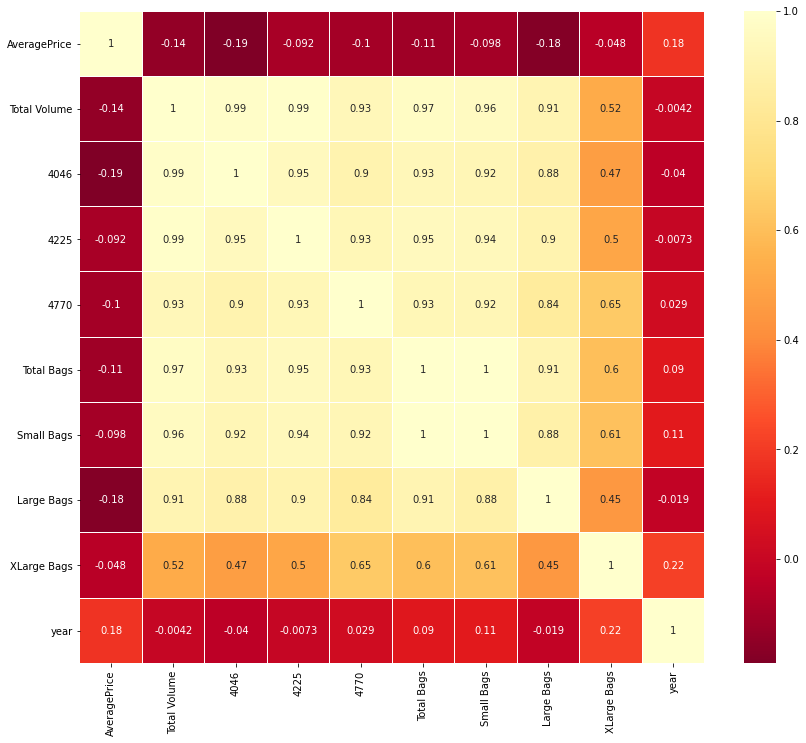

In [28]:
plt.figure(figsize=(14,12))
sns.heatmap(DF.corr(),linewidths=.1,cmap="YlOrRd_r", annot=True)
plt.yticks(rotation=0);

This heatmap shows the correlation between the columns. 

**Skewness**

In [29]:
DF.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
dtype: float64

We can see that the data is highly skewed.

--->Applying log transformation

In [30]:
skew=('Total Volume', '4046', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year')
for col in skew:
  if DF.skew().loc[col]>0.5:
    DF[col]=np.log(DF[col])

In [31]:
DF.skew()

AveragePrice   -0.109444
Total Volume    0.667461
4046           -0.160523
4225            6.394926
4770                 NaN
Total Bags      0.695445
Small Bags      0.713786
Large Bags           NaN
XLarge Bags          NaN
year            1.828332
dtype: float64

We can see that there is high skewness in '4225' after applying log transformation also. So applying Cube root Transformation for this column.

In [32]:
cube_root_4225 = np.cbrt(DF['4225'])

In [33]:
cube_root_4225.skew()

1.7759445530437739

We can see that the skewness is changed to 1.7759445530437739 from 6.394926.

**Checking Average price by Date**

Text(0.5, 1.0, 'Average Price')

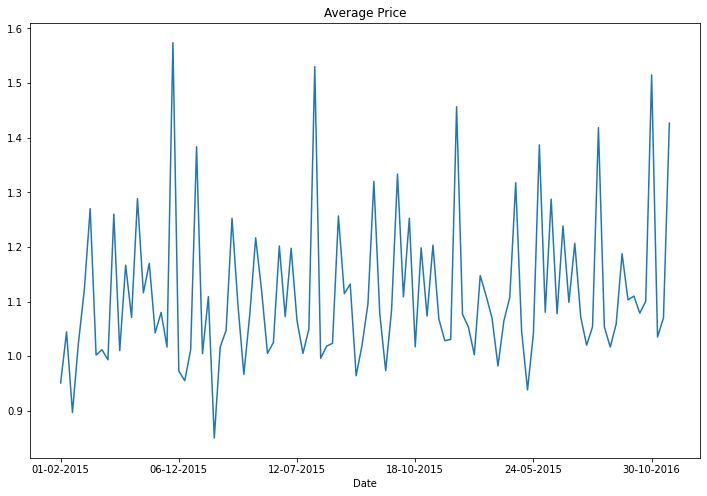

In [34]:
Date_=DF.groupby('Date').mean()
plt.figure(figsize=(12,8))
Date_['AveragePrice'].plot()
plt.title('Average Price')

**Checking Average price by Year**

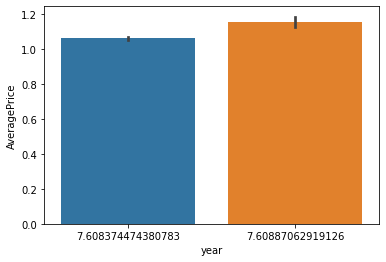

In [35]:
sns.barplot(x='year', y='AveragePrice', data=DF)

We can see that the Average price was higher in 2016 than that in 2015.

**Handling Outliers**

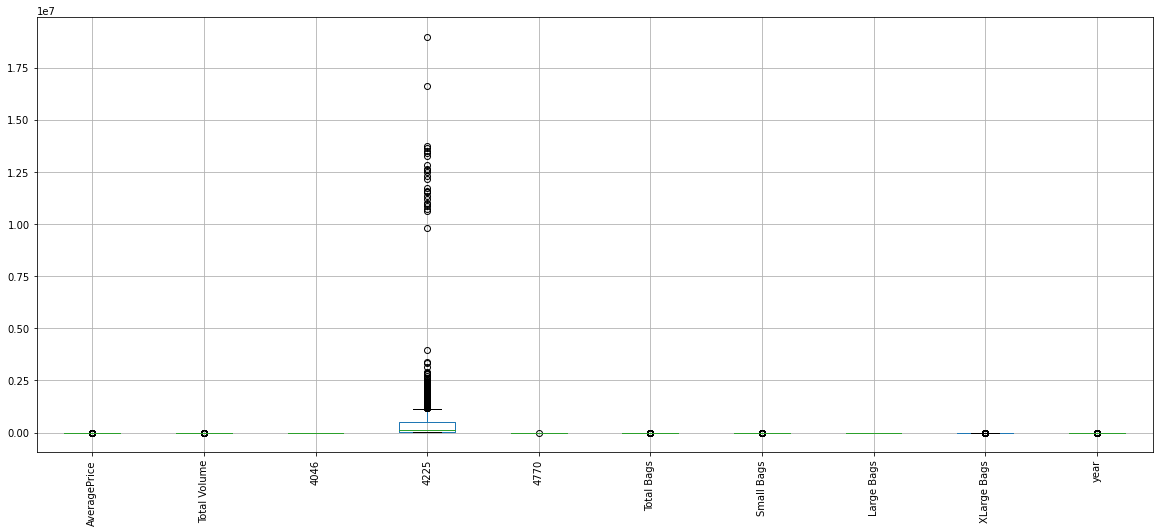

In [36]:
DF.boxplot( rot = 90, figsize=(20,8))

We can see that there are outliers in almost all the columns.

<br>---> Calculating Z-score

In [37]:
from scipy import stats
from scipy.stats import zscore

z_tvol=np.abs(zscore(DF['Total Volume']))
z_score1=np.abs(zscore(DF['4046']))
z_score2=np.abs(zscore(DF['4225']))
z_score3=np.abs(zscore(DF['4770']))
z_tbags=np.abs(zscore(DF['Total Bags']))
z_sbags=np.abs(zscore(DF['Small Bags']))
z_xlbags=np.abs(zscore(DF['XLarge Bags']))

print(z_tvol)
print(z_score1)
print(z_score2)
print(z_score3)
print(z_tbags)
print(z_sbags)
print(z_xlbags)






[1.35676542 1.46639257 0.93213935 ... 0.64565172 0.60502956 0.62805431]
[1.82835304 2.01246553 1.94214044 ... 0.20183865 0.13571848 0.23292521]
[0.33305294 0.33892254 0.30034767 ... 0.33398664 0.33356795 0.33320927]
[nan nan nan ... nan nan nan]
[1.68476351 1.62015622 1.73236933 ... 0.25268295 0.23524543 0.1787101 ]
[1.53928227 1.47501128 1.58780228 ... 0.22749591 0.19686747 0.17394552]
[nan nan nan ... nan nan nan]


In [38]:
DF['type'].value_counts()

conventional    1517
Name: type, dtype: int64

In [39]:
DF['type'].nunique()

1

All the avocados are of same type.<br> Dropping this column as it does not affect the price prediction.

In [40]:
DF.drop(['type'], axis=1, inplace=True)

In [41]:
DF.shape

(1517, 12)

In [42]:
df_new=pd.get_dummies(DF.drop(['region', 'XLarge Bags', 'year', 'Date'],axis=1),drop_first=True)

**Encoding**

In [54]:
from sklearn.preprocessing import LabelEncoder
for column in df_new.columns:
  if df_new[column].dtype == np.number:
    continue
  df_new[column] = LabelEncoder().fit_transform(df_new[column])

 ### <br><br>Predictive Modeling

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import GridSearchCV

**Splitting data for validation**

In [52]:
X=df_new.iloc[:,1:7]
y=df_new['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:
df_new.replace([np.inf, -np.inf], np.nan, inplace=True)


In [51]:
df_new.fillna(999, inplace=True)

In [53]:
X_train = X_train.fillna(X_train.mean())

**--->Checking RMSE Scores**

Decision Tree Regresssor Model

In [59]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.07805921052631579
MSE: 0.013300328947368422
RMSE: 0.11532705210560279


Random Forest Regressor Model

In [61]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [62]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.06224638157894734
MSE: 0.007494957730263161
RMSE: 0.08657342392595525


Linear Regression Model

In [63]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [64]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.11422572939648623
MSE: 0.022808291631423814
RMSE: 0.1510241425449051


We can see that the  Random Forest Regressor has least RMSE value, so considering this as the best model.

**Predictions**

,Y Test,Pred
724,1.18,1.245436
812,1.25,1.239783
1466,1.08,1.032433
1469,1.07,1.022006
51,1.22,1.216002


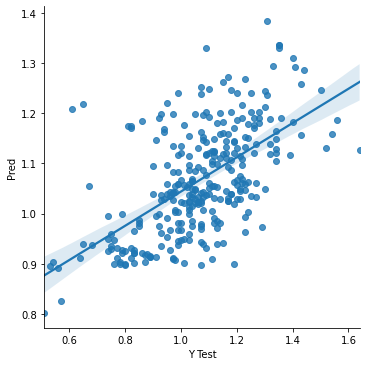

In [69]:
DF_Output = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=DF_Output,palette='rainbow')
DF_Output.head()

### Saving the Model

In [85]:
import joblib

In [86]:
joblib.dump(rdr, 'Avocado_Project.pkl')

['Avocado_Project.pkl']

In [87]:
# Load the model from the file
rdr_from_joblib = joblib.load('Avocado_Project.pkl')

In [88]:
# Use the loaded model to make predictions
rdr_from_joblib.predict(X_test)

array([1.1184, 1.2203, 0.8811, 0.9928, 1.3096, 0.9131, 1.0346, 1.118 ,
       1.1343, 0.9498, 1.0845, 1.0918, 1.1941, 0.9917, 1.0831, 0.8346,
       1.0861, 1.0813, 1.2025, 1.1501, 1.0882, 1.1292, 1.0202, 1.4171,
       1.1869, 0.6193, 1.0234, 0.7861, 1.2265, 0.7198, 1.2353, 0.9988,
       1.1917, 1.0263, 0.7547, 1.2717, 1.2659, 1.0645, 0.9813, 1.1023,
       1.1313, 1.1486, 1.3512, 1.0308, 0.9627, 1.0902, 1.1739, 1.0624,
       0.8487, 1.0424, 1.3   , 0.9798, 1.2124, 1.067 , 1.066 , 1.1997,
       1.2339, 1.1023, 1.0094, 1.215 , 1.1854, 1.0217, 1.2971, 1.1075,
       1.2079, 0.8369, 0.5916, 1.0971, 0.7479, 1.1265, 1.2083, 0.7791,
       1.1003, 1.0133, 1.019 , 1.0339, 1.1607, 1.2275, 1.2226, 0.8327,
       1.1418, 0.7418, 1.1693, 0.5681, 1.04  , 0.7834, 1.0013, 0.7318,
       1.1593, 1.2909, 1.101 , 1.3325, 1.0805, 1.0736, 1.1042, 1.0802,
       1.1811, 1.3595, 0.9649, 1.0616, 1.2866, 1.0267, 0.8953, 1.0224,
       1.0485, 0.981 , 1.0634, 1.2407, 1.0552, 1.1967, 1.0854, 1.3472,
      